<a href="https://colab.research.google.com/github/ScarlettQiu/OCR_for_Bank_Statement/blob/main/OpenCV_PyTesseract_loan1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#need to install pytersseract before importing it
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
pip install Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
#git clone the image dataset from GitHub
url = 'https://github.com/ScarlettQiu/OCR_for_Bank_Statement/tree/dc3b2388bc59637feef5cfafa6b146f6511cc3b4/Dataset'
!git clone https://github.com/ScarlettQiu/OCR_for_Bank_Statement.git 

fatal: destination path 'OCR_for_Bank_Statement' already exists and is not an empty directory.


In [23]:
import cv2
import glob
import numpy as np
import pandas as pd
import pytesseract
from pprint import pprint
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[14, 8]

import warnings
warnings.filterwarnings('ignore')

In [24]:
#define file path
filename = 'OCR_for_Bank_Statement/Dataset2/loan1.png'

#convert image to string
img = cv2.imread(filename)

# Re-scale the image before passing it to tesseract and do
#scale_factor = 6

In [25]:
#Image Processing

#def image_scale(image, scale_factor):
#  # Re-scale the image before passing it to tesseract and do
#  img = cv2.resize(image, (0,0), fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_CUBIC)
#  return img

#img = image_scale(image, scale_factor)
  

In [26]:
# Preprocessing the image starts
 
# Convert the image to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
# Performing OTSU threshold
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
 
# Specify structure shape and kernel size.
# Kernel size increases or decreases the area
# of the rectangle to be detected.
# A smaller value like (10, 10) will detect
# each word instead of a sentence.
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20,20))
 
# Applying dilation on the threshold image
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 2)
 
# Finding contours
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,
                                                 cv2.CHAIN_APPROX_NONE)
contours = sorted(contours, key=cv2.contourArea, reverse=True) 
# Creating a copy of image
im2 = img.copy()

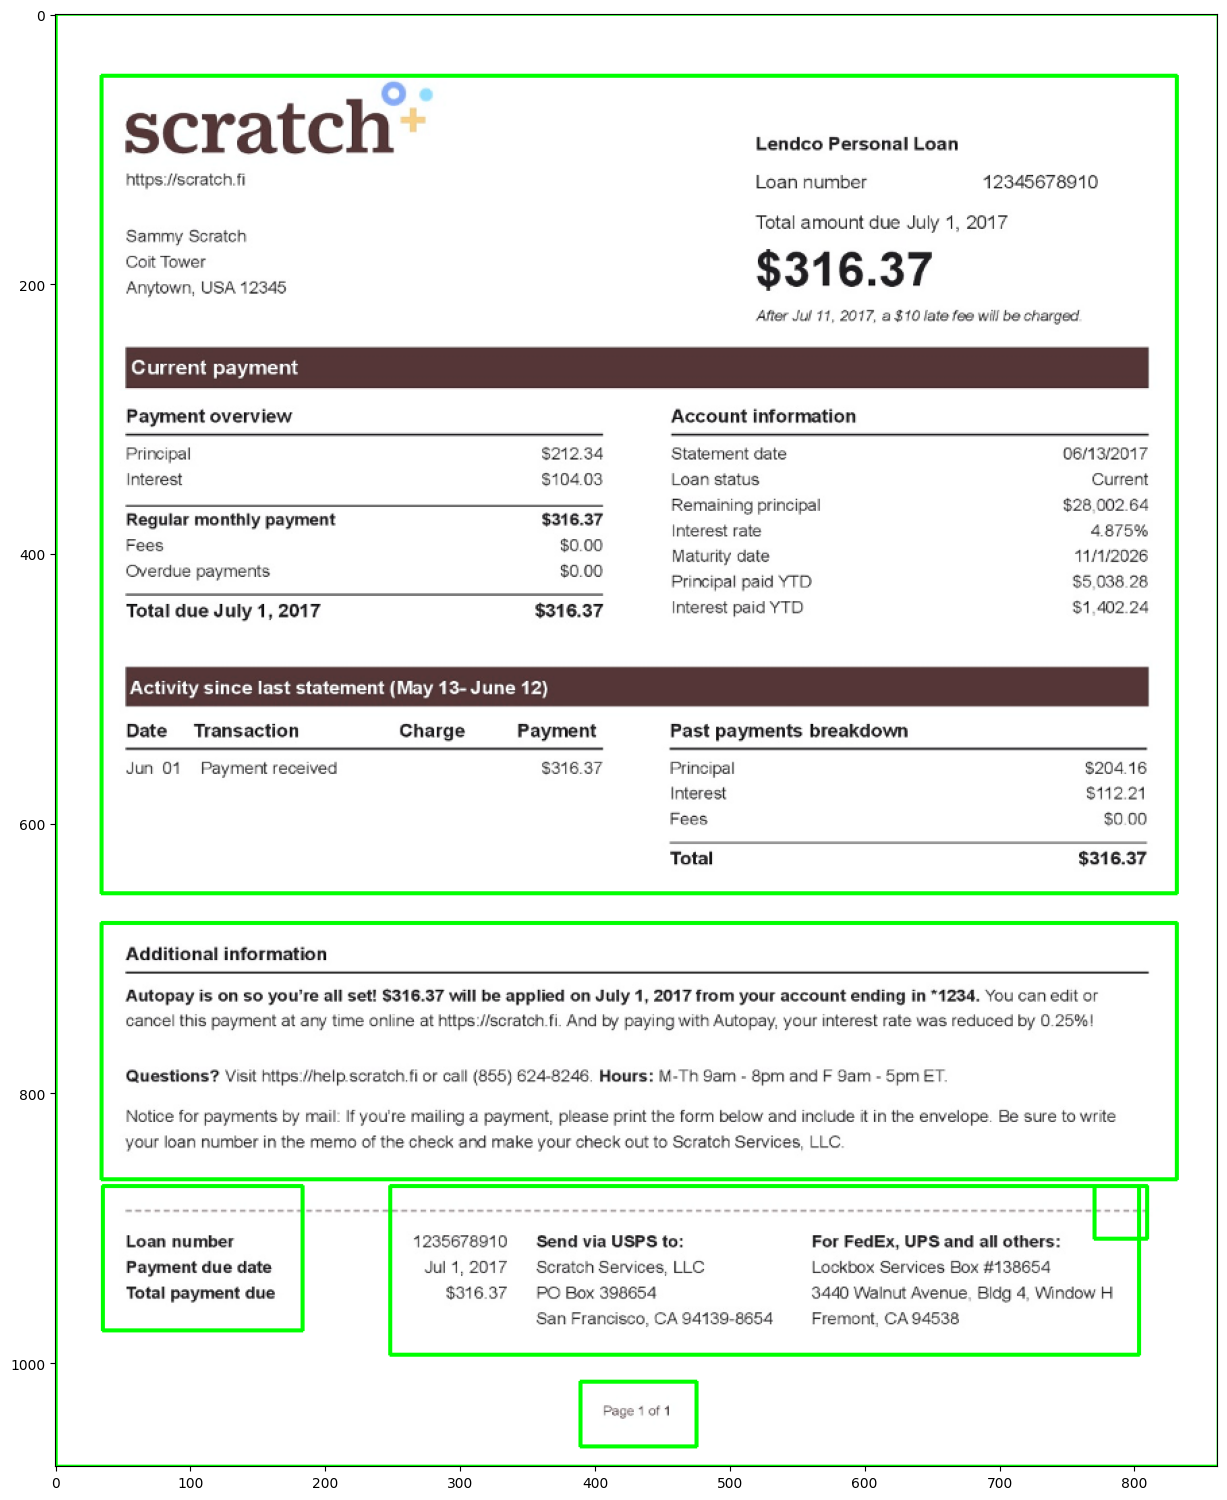

In [27]:
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
     
    # Drawing a rectangle on copied image
    rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2)
fig, ax = plt.subplots(figsize=(15,20))
plt.imshow(im2)
plt.show()

In [28]:
for n,cnt in enumerate(contours):
    x, y, w, h = cv2.boundingRect(cnt)
     
    # Drawing a rectangle on copied image
    rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2)
     
    # Cropping the text block for giving input to OCR
    cropped = im2[y:y + h, x:x + w]
     
    # Open the file in append mode
    #file = open("recognized.txt", "a")
     
    # Apply OCR on the cropped image
    text = pytesseract.image_to_string(cropped)
     
    # Appending the text into file
    #file.write(text)
    #file.write("\n")
     
    # Close the file
    #if n == 4:
    print(f'(Conrours {n}:' + text)

(Conrours 0: 

 

scratch”

hitpsiiscratch fi

‘Sammy Soratch
Coit Tower
Anytown, USA 12345

Lendco Personal Loan
Loan number 12345678910

Total amount due July 1, 2017

$316.37

After Jul 11, 2017, a $10 late fee wil be charged.

Current payment

Payment overview

Account information

 

Principal $212.34
Interest $104.03
Regular monthly payment $316.37
Fees $0.00
Overdue payments $0.00
Total due July 1, 2017 $316.37

Statement date 06/13/2017
Loan status Current
Remaining principal $28,002.64
Interest rate 4.875%
Maturity date 111112026
Principal paid YTD $5,038.28
Interest paid YTD $1,402.24

Activity since last statement (May 13- June 12)

 

Date Transaction Charge Payment Past payments breakdown

Jun 01 Payment received $316.37 Principal $204.16
Interest $112.21
Fees $0.00

Total $316.37

 

 

(Conrours 1: 

 

Additional information

 

Autopay is on so you're all set! $316.37 will be applied on July 1, 2017 from your account ending in *4234. You can edit or
cancel this paymen

In [32]:
ground_value = ''' 

 


scratch* Lendco Personal Loan

https://scratch.fi Loan number 12345678910

Sammy Scratch Total amount due July 1, 2017

   $316.37

Anytown, USA 12345
After Jul 11, 2017, a $10 late fee wil be charged,

Current payment

Payment overview Account information

 

Principal $212.34 Statement date 06/13/2017
Interest $104.03, Loan status Current
Remaining principal $28,002.64
Interest rate 4.875%
Maturity date 11/1/2026
Principal paid YTD $5,038.26
Total due July 1, 2017 $316.37 Interest paid YTD $1,402.24

Regular monthly payment $316.37
Fees $0.00
Overdue payments $0.00

Activity since last statement (May 13- June 12)

Date Transaction Charge Payment Past payments breakdown

 

Jun 01 Payment received $316.37 Principal $204.16
Interest $112.21
Fees $0.00

Total $316.37

Additional information

 

Autopay is on so you're all set! $316.37 will be applied on July 1, 2017 from your account ending in *1234. You can edit or
cancel this payment at any time online at https://scratch.fi, And by paying with Autopay, your interest rate was reduced by 0.25%!

Questions? Visit https://help.scratch.fi or call (855) 624-8246, Hours: M-Th 9am - 8pm and F 9am - 5pm ET.

Notice for payments by mail: if youre mailing a payment, please print the form below and include it in the envelope. Be sure to write
your loan number in the memo of the check and make your check out to Scratch Services, LLC.

Loan number 1236678910 Send via USPS to: For FedEx, UPS and all others:

Payment due date Jul1, 2017 — Scratch Services, LLC Lockbox Services Box #138654

Total payment due $316.37 PO Box 398654 3440 Walnut Avenue, Bldg 4, Window H
San Francisco, CA 94139-8654 Fremont, CA94538
'''

In [33]:
from Levenshtein import distance

text = ''' 

 

Oe
scratch* Lendco Persona toa

hitpsifscratch fi Loan number 12345678910

Sammy Scratch Total amount due July 1, 2017

os $316.37

Anytown, USA 12345
After Jul 11, 2017, a $10 late fee wil be charged,

Current payment

Payment overview Account information

 

Principal $2712.34 Statement date 06/13/2017
Interest $104.03, Loan status Current
Remaining principal $28,002.64
Interest rate 4875%
Maturity date 1111/2026
Principal paid YTD $5,038.26
Total due July 1, 2017 $316.37 Interest paid YTD $1,402.24

Regular monthly payment $316.37
Fees $0.00
Overdue payments $80.00

Activity since last statement (May 13- June 12)

Date Transaction Charge Payment Past payments breakdown

 

Jun 01 Payment received $316.37 Principal $204.16
Interest $112.21
Fees $0.00

Total $316.37

Additional information

 

Autopay is on so you're all set! $316.37 will be applied on July 1, 2017 from your account ending in *4234. You can edit or
cancel this payment at any time online at https://scratch.fi, And by paying with Autopay, your interest rate was reduced by 0.25%!

Questions? Visit https://help scratch.fi or call (855) 624-8246, Hours: M-Th 9am - 8pm and F 9am - Spm ET.

Notice for payments by rail: if youre mailing a payment, please print the form below and include it in the envelope. Be sure to write
your loan number in the memo of the check and make your check out to Scratch Services, LLC.

Loan number 1236678910 Send via USPS to: For FedEx, UPS and all others:

Payment due date Jul1, 2017 — Scratch Services, LLC Lockbox Services Box #138654

Total payment due $316.37 PO Box 398654 3440 Walnut Avenue, Bldg 4, Window H
San Francisco, CA 94139-8654 Fremont, CA94538
'''


print(distance(ground_value, text))

20


In [34]:
from difflib import SequenceMatcher

sm = SequenceMatcher(None, text, ground_value)
true_positive_char_num = 0
for tag, i1, i2, j1, j2 in sm.get_opcodes():
    if tag== 'equal':
        true_positive_char_num += (j2 - j1)
    else:
        pass

print(f'accuracy = {true_positive_char_num/len(ground_value)}')

accuracy = 0.9631171921475312
